# Part 3. Enhancement

#### **3.5.2 Testing Fine-Tuning of Pretrained BERT Fmaily of Models: Fine-Tune a Pretrained BERT, DistilBERT, RoBERTa, XLNet, ALBERT, and ELECTRA Model as a Strong Baseline**

In section **3.5.2 Test Pretrained Model Fine-Tuning**, we fine-tune six different pretrained models from the BERT Family: **BERT**, **DistilBERT**, **RoBERTa**, **XLNet**, **ALBERT**, and **ELECTRA**. These models have been widely adopted in NLP for their state-of-the-art (SoTA) performance and adaptability across various tasks. Each serves as a strong baseline for sentiment classification.

#### **Introduction**
Fine-tuning pretrained language models has become a standard for achieving robust performance on NLP tasks, including sentiment classification. In this section, we explore the effectiveness of fine-tuning six distinct models—each with unique architecture and training strategies—on our sentiment classification task.

---
#### **Model Selection**

- **BERT** (Bidirectional Encoder Representations from Transformers): Known for capturing bidirectional context, BERT has been transformative in NLP, setting strong baselines across various tasks.
  
- **DistilBERT**: A distilled, smaller version of BERT, optimized for speed and efficiency without sacrificing significant performance. It’s ideal for real-time applications and resource-constrained environments.

- **RoBERTa** (Robustly optimized BERT approach): An enhanced version of BERT, trained with dynamic masking, larger batches, and more data, often yielding superior results.

- **XLNet**: Unlike BERT, XLNet uses an autoregressive framework to capture bidirectional context and is particularly effective in tasks with complex dependencies.

- **ALBERT** (A Lite BERT): ALBERT uses parameter-sharing and a factorized embedding layer to reduce memory and computational costs, while retaining strong performance.

- **ELECTRA**: Based on a novel training strategy where the model learns by distinguishing real tokens from "replaced" tokens, ELECTRA often achieves competitive results with shorter training time.



---


#### **Implementation Steps**

1. **Initialize Tokenizers and Models**  
   - For each model, load the tokenizer and the model architecture with pre-trained weights from Hugging Face's `transformers` library. This includes setting the number of labels for classification.

2. **Set Up Data Preparation**  
   - The processed datasets (training, validation, and test sets) are tokenized and padded to ensure consistency across all models.  
   - Use PyTorch's `DataLoader` to batch the data for efficient training.

3. **Define Optimization and Learning Rate Scheduling**  
   - Use the `AdamW` optimizer for each model and a linear learning rate scheduler with warm-up steps to gradually adjust learning rates.

4. **Training and Validation Process**  
   - For each model, fine-tune by iterating through epochs, computing loss and accuracy on both training and validation sets.
   - Implement early stopping based on validation accuracy to prevent overfitting and save the best model state.

5. **Testing**  
   - After fine-tuning, evaluate each model on the test set to assess its final performance in terms of accuracy and loss.

6. **Result Comparison**  
   - Plot training and validation accuracy and loss for each model. This allows us to visually compare how well each model adapts to the dataset during fine-tuning.

---


### **Comparative Analysis**

Before testing each model on the test set, we have the following hypothesis for each model's accuracy and loss metrics based on reserach:

- **BERT**: Base model with strong generalization across tasks.
- **DistilBERT**: Efficient and faster, with comparable accuracy to BERT.
- **RoBERTa**: Often performs better than BERT due to robust pretraining.
- **XLNet**: Captures bidirectional context with autoregressive training.
- **ALBERT**: Lightweight model, which is efficient but with good performance.
- **ELECTRA**: Known for fast and effective fine-tuning with discriminative training.


In [2]:
!pip3 install torch torchvision torchaudio


In [3]:
!pip install datasets nltk gensim sentencepiece transformers huggingface


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [4]:
!pip install matplotlib

In [5]:
# from datasets import load_dataset
# from transformers import BertTokenizer, TFBertForSequenceClassification
# import tensorflow as tf

In [46]:
from datasets import DatasetDict, Dataset
from datasets import load_dataset
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize
import ssl
from gensim.models import KeyedVectors
from huggingface_hub import hf_hub_download
from sentencepiece import SentencePieceProcessor
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer
import tensorflow as tf

import os


import torch
from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt


In [47]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.17.0


In [48]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("GPU is available:", tf.test.is_gpu_available())
print("GPU Device Name:", tf.test.gpu_device_name() if tf.test.is_gpu_available() else "No GPU available")


Num GPUs Available: 1
GPU is available: True
GPU Device Name: /device:GPU:0


In [49]:
import torch
print("Is CUDA available:", torch.cuda.is_available())
print("GPU Device Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU available")
print("CUDA Version:", torch.version.cuda)
print("PyTorch Version:", torch.__version__)

Is CUDA available: True
GPU Device Name: NVIDIA L4
CUDA Version: 12.1
PyTorch Version: 2.5.0+cu121


## Part 0: Dataset Preparation

In [50]:
dataset: DatasetDict = load_dataset("cornell-movie-review-data/rotten_tomatoes")
train = dataset['train']
val = dataset['validation']
test = dataset['test']

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import torch
from transformers import BertTokenizer
from torch.utils.data import TensorDataset

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

def tokenize_data(data):
    input_ids = []
    attention_masks = []
    labels = []

    for row in data:
        text = row['text']
        label = row['label']

        # Encode the text using BERT tokenizer
        encoding = tokenizer.encode_plus(
            text,
            add_special_tokens=True,      # Add '[CLS]' and '[SEP]'
            max_length=128,               # Set max length according to your needs
            padding='max_length',         # Pad sequences to max length
            truncation=True,              # Truncate sequences longer than max length
            return_attention_mask=True,
            return_tensors='pt',          # Return PyTorch tensors
        )

        input_ids.append(encoding['input_ids'])
        attention_masks.append(encoding['attention_mask'])
        labels.append(label)

    # Convert lists to tensors
    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)
    labels = torch.tensor(labels)

    return TensorDataset(input_ids, attention_masks, labels)


train_dataset = tokenize_data(train)
val_dataset = tokenize_data(val)
test_dataset = tokenize_data(test)


#older implementation of preprocessing the data using lemmatization and stemming
#gave slightly worse reults than the current implementation
'''
# # Initialize BERT tokenizer
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# # Initialize NLTK's lemmatizer and stemmer
# lemmatizer = WordNetLemmatizer()
# stemmer = PorterStemmer()

# def preprocess_text(text):
#     # Tokenize the text
#     tokens = word_tokenize(text.lower())
#     # Apply lemmatization and stemming
#     processed_tokens = [stemmer.stem(lemmatizer.lemmatize(token)) for token in tokens]
#     # Join the tokens back into a single string
#     return ' '.join(processed_tokens)

# def tokenize_data(data):
#     input_ids = []
#     attention_masks = []
#     labels = []

#     for row in data:
#         text = row['text']
#         label = row['label']

#         # Preprocess the text with lemmatization and stemming
#         processed_text = preprocess_text(text)

#         # Encode the text using BERT tokenizer
#         encoding = tokenizer.encode_plus(
#             processed_text,
#             add_special_tokens=True,      # Add '[CLS]' and '[SEP]'
#             max_length=128,               # Set max length according to your needs
#             padding='max_length',         # Pad sequences to max length
#             truncation=True,              # Truncate sequences longer than max length
#             return_attention_mask=True,
#             return_tensors='pt',          # Return PyTorch tensors
#         )

#         input_ids.append(encoding['input_ids'])
#         attention_masks.append(encoding['attention_mask'])
#         labels.append(label)

#     # Convert lists to tensors
#     input_ids = torch.cat(input_ids, dim=0)
#     attention_masks = torch.cat(attention_masks, dim=0)
#     labels = torch.tensor(labels)

#     return TensorDataset(input_ids, attention_masks, labels)

# train_dataset = tokenize_data(train)
# val_dataset = tokenize_data(val)
# test_dataset = tokenize_data(test)
'''

"\n# # Initialize BERT tokenizer\n# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)\n\n# # Initialize NLTK's lemmatizer and stemmer\n# lemmatizer = WordNetLemmatizer()\n# stemmer = PorterStemmer()\n\n# def preprocess_text(text):\n#     # Tokenize the text\n#     tokens = word_tokenize(text.lower())\n#     # Apply lemmatization and stemming\n#     processed_tokens = [stemmer.stem(lemmatizer.lemmatize(token)) for token in tokens]\n#     # Join the tokens back into a single string\n#     return ' '.join(processed_tokens)\n\n# def tokenize_data(data):\n#     input_ids = []\n#     attention_masks = []\n#     labels = []\n\n#     for row in data:\n#         text = row['text']\n#         label = row['label']\n\n#         # Preprocess the text with lemmatization and stemming\n#         processed_text = preprocess_text(text)\n\n#         # Encode the text using BERT tokenizer\n#         encoding = tokenizer.encode_plus(\n#             processed_text,\n#       

In [53]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 32

train_dataloader = DataLoader(
    train_dataset,
    sampler=RandomSampler(train_dataset),
    batch_size=batch_size
)

validation_dataloader = DataLoader(
    val_dataset,
    sampler=SequentialSampler(val_dataset),
    batch_size=batch_size
)

test_dataloader = DataLoader(
    test_dataset,
    sampler=SequentialSampler(test_dataset),
    batch_size=batch_size
)


## Part 1: Bert Finetuning

In [36]:
from transformers import BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup

# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=2,       # Number of classes for classification
    output_attentions=False,
    output_hidden_states=False,
)

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [14]:
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

epochs = 15
total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,          # Default value in run_glue.py
    num_training_steps=total_steps
)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [15]:
import numpy as np
import time
import datetime
import torch.nn.functional as F

def format_time(elapsed):
    return str(datetime.timedelta(seconds=int(round((elapsed)))))

import torch.nn.functional as F

# Early stopping parameters
patience = 5
best_val_accuracy = 0
epochs_no_improve = 0


# Initialize the history dictionary
history = {
    'accuracy': [],
    'val_accuracy': [],
    'loss': [],
    'val_loss': []
}

for epoch_i in range(0, epochs):
    print('')
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()
    total_train_loss = 0
    total_train_accuracy = 0

    model.train()

    for step, batch in enumerate(train_dataloader):
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()

        outputs = model(
            b_input_ids,
            attention_mask=b_input_mask,
            labels=b_labels
        )

        loss = outputs.loss
        logits = outputs.logits

        total_train_loss += loss.item()

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

        # Compute training accuracy on this batch
        preds = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        preds_flat = np.argmax(preds, axis=1).flatten()
        labels_flat = label_ids.flatten()
        batch_accuracy = np.sum(preds_flat == labels_flat) / len(labels_flat)
        total_train_accuracy += batch_accuracy

    # Calculate the average loss and accuracy over all batches
    avg_train_loss = total_train_loss / len(train_dataloader)
    avg_train_accuracy = total_train_accuracy / len(train_dataloader)
    training_time = format_time(time.time() - t0)

    print('')
    print('Average training loss: {0:.4f}'.format(avg_train_loss))
    print('Average training accuracy: {0:.4f}'.format(avg_train_accuracy))
    print('Training epoch took: {}'.format(training_time))

    # Record training loss and accuracy
    history['loss'].append(avg_train_loss)
    history['accuracy'].append(avg_train_accuracy)

    # Validation
    print('')
    print('Running Validation...')

    t0 = time.time()
    model.eval()

    total_eval_accuracy = 0
    total_eval_loss = 0

    for batch in validation_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        with torch.no_grad():
            outputs = model(
                b_input_ids,
                attention_mask=b_input_mask,
                labels=b_labels
            )

        loss = outputs.loss
        logits = outputs.logits

        total_eval_loss += loss.item()

        preds = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        preds_flat = np.argmax(preds, axis=1).flatten()
        labels_flat = label_ids.flatten()

        total_eval_accuracy += np.sum(preds_flat == labels_flat) / len(labels_flat)

    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print('Validation Accuracy: {0:.4f}'.format(avg_val_accuracy))

    avg_val_loss = total_eval_loss / len(validation_dataloader)
    validation_time = format_time(time.time() - t0)

    print('Validation Loss: {0:.4f}'.format(avg_val_loss))
    print('Validation epoch took: {}'.format(validation_time))

    # Record validation loss and accuracy
    history['val_loss'].append(avg_val_loss)
    history['val_accuracy'].append(avg_val_accuracy)

    # Early stopping
    if avg_val_accuracy > best_val_accuracy:
        best_val_accuracy = avg_val_accuracy
        epochs_no_improve = 0
        best_model_state = model.state_dict()
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print('Early stopping triggered. No improvement in validation accuracy for {} epochs.'.format(patience))
            model.load_state_dict(best_model_state)
            break



======== Epoch 1 / 15 ========
Training...

Average training loss: 0.4016
Average training accuracy: 0.8169
Training epoch took: 0:01:15

Running Validation...
Validation Accuracy: 0.8572
Validation Loss: 0.3222
Validation epoch took: 0:00:03

======== Epoch 2 / 15 ========
Training...

Average training loss: 0.2164
Average training accuracy: 0.9198
Training epoch took: 0:01:14

Running Validation...
Validation Accuracy: 0.8471
Validation Loss: 0.3878
Validation epoch took: 0:00:03

======== Epoch 3 / 15 ========
Training...

Average training loss: 0.1025
Average training accuracy: 0.9664
Training epoch took: 0:01:15

Running Validation...
Validation Accuracy: 0.8500
Validation Loss: 0.5317
Validation epoch took: 0:00:03

======== Epoch 4 / 15 ========
Training...

Average training loss: 0.0600
Average training accuracy: 0.9843
Training epoch took: 0:01:15

Running Validation...
Validation Accuracy: 0.8592
Validation Loss: 0.7114
Validation epoch took: 0:00:03

======== Epoch 5 / 15 =

In [16]:
print(history.keys())
# Output: dict_keys(['accuracy', 'val_accuracy', 'loss', 'val_loss'])


print('Training Accuracy:', history['accuracy'])
print('Validation Accuracy:', history['val_accuracy'])
print('Training Loss:', history['loss'])
print('Validation Loss:', history['val_loss'])



dict_keys(['accuracy', 'val_accuracy', 'loss', 'val_loss'])
Training Accuracy: [0.8169345609654598, 0.9198267790262172, 0.9664091760299626, 0.9843164794007491, 0.990753745318352, 0.9949672284644194, 0.9970999791926759, 0.9974250936329588, 0.9984784644194756, 0.9983614232209738]
Validation Accuracy: [0.8571691176470588, 0.8470588235294118, 0.85, 0.8591911764705882, 0.861764705882353, 0.8573529411764705, 0.8553308823529412, 0.8571691176470588, 0.8534926470588236, 0.8555147058823529]
Training Loss: [0.40158096929726084, 0.2163888094842099, 0.10249299669728967, 0.06002050582520064, 0.03140215530654953, 0.02013405915043423, 0.01208821914486534, 0.00929108235438063, 0.006782694392313715, 0.007181927708260129]
Validation Loss: [0.3221748160088764, 0.38784024064593453, 0.5317041847635718, 0.7114080734112683, 0.8471792046638096, 0.930688643718467, 1.0524301897077, 1.0599557853796904, 1.1694219305234796, 1.1525424026391085]


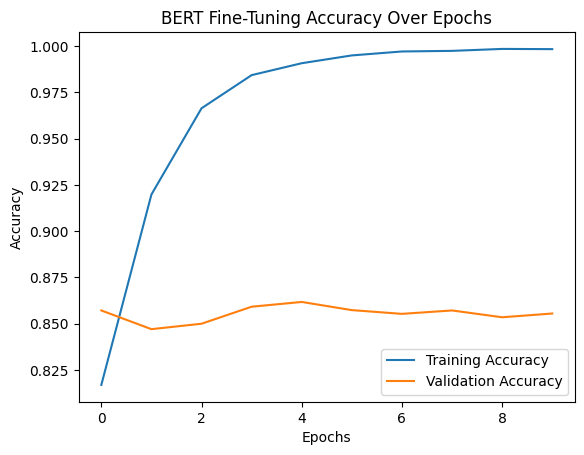

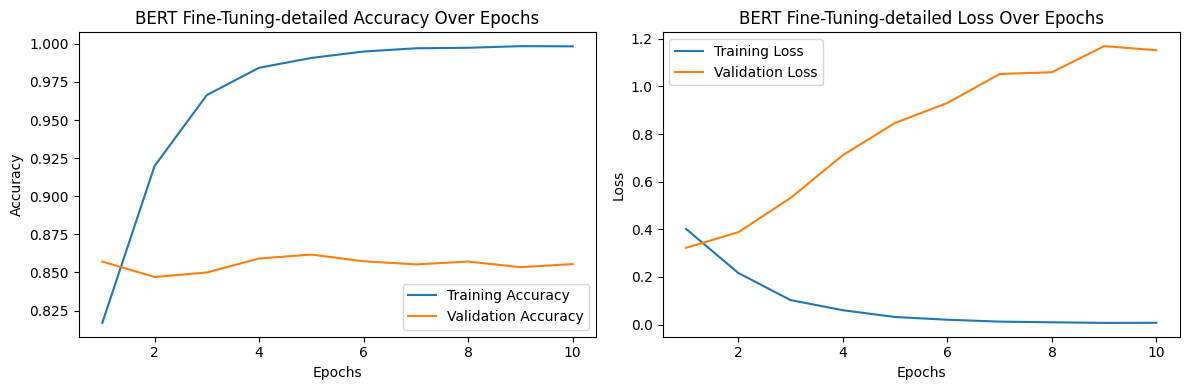

In [17]:
import matplotlib.pyplot as plt

# Define the plotting functions (as you've provided)
def plot_history(hist, model_name):
    history = hist  # Access the dictionary directly

    # Plot validation and training accuracy
    plt.plot(history['accuracy'], label='Training Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')

    # Add title and axis labels
    plt.title(f'{model_name} Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    # Add legend
    plt.legend()

    # Display the plot
    plt.show()

def plot_history_detailed(hist, model_name):
    history = hist
    epochs = range(1, len(history['accuracy']) + 1)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['loss'], label='Training Loss')
    plt.plot(epochs, history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the results
plot_history(history, 'BERT Fine-Tuning')

# Plot the training and validation accuracy and loss
plot_history_detailed(history, 'BERT Fine-Tuning-detailed')


In [18]:
print('')
print('Running Test...')
import time

t0 = time.time()
model.eval()

total_test_accuracy = 0
total_test_loss = 0

for batch in test_dataloader:
    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)

    with torch.no_grad():
        outputs = model(
            b_input_ids,
            attention_mask=b_input_mask,
            labels=b_labels
        )

    loss = outputs.loss
    logits = outputs.logits

    total_test_loss += loss.item()

    preds = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = label_ids.flatten()

    total_test_accuracy += np.sum(preds_flat == labels_flat) / len(labels_flat)

avg_test_accuracy = total_test_accuracy / len(test_dataloader)
print('Test Accuracy: {0:.4f}'.format(avg_test_accuracy))

avg_test_loss = total_test_loss / len(test_dataloader)
test_time = format_time(time.time() - t0)

print('Test Loss: {0:.4f}'.format(avg_test_loss))
print('Test took: {}'.format(test_time))



Running Test...
Test Accuracy: 0.8456
Test Loss: 1.2309
Test took: 0:00:03


## Part 2: DistilBERT Fine-Tuning

In [19]:
# Part 2: DistilBERT Fine-Tuning

from transformers import DistilBertForSequenceClassification, DistilBertTokenizer

# Initialize DistilBERT tokenizer and model
distilbert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
distilbert_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# Move model to GPU if available
distilbert_model.to(device)

# Define optimizer and scheduler
distilbert_optimizer = AdamW(distilbert_model.parameters(), lr=2e-5, eps=1e-8)
distilbert_scheduler = get_linear_schedule_with_warmup(
    distilbert_optimizer,
    num_warmup_steps=0,
    num_training_steps=len(train_dataloader) * epochs
)

# History dictionary for tracking performance
distilbert_history = {
    'accuracy': [],
    'val_accuracy': [],
    'loss': [],
    'val_loss': []
}

best_val_accuracy = 0
epochs_no_improve = 0

for epoch_i in range(epochs):
    print(f'\n======== Epoch {epoch_i + 1} / {epochs} ========')
    print('Training DistilBERT...')

    # Training
    t0 = time.time()

    total_train_loss = 0
    total_train_accuracy = 0
    distilbert_model.train()

    for batch in train_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        distilbert_model.zero_grad()

        outputs = distilbert_model(
            b_input_ids,
            attention_mask=b_input_mask,
            labels=b_labels
        )

        loss = outputs.loss
        logits = outputs.logits
        total_train_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(distilbert_model.parameters(), 1.0)
        distilbert_optimizer.step()
        distilbert_scheduler.step()

        # Training accuracy
        preds = logits.detach().cpu().numpy()
        labels = b_labels.cpu().numpy()
        batch_accuracy = np.sum(np.argmax(preds, axis=1).flatten() == labels.flatten()) / len(labels)
        total_train_accuracy += batch_accuracy

    avg_train_loss = total_train_loss / len(train_dataloader)
    avg_train_accuracy = total_train_accuracy / len(train_dataloader)
    training_time = format_time(time.time() - t0)

    print('')
    print('Average training loss: {0:.4f}'.format(avg_train_loss))
    print('Average training accuracy: {0:.4f}'.format(avg_train_accuracy))
    print('Training epoch took: {}'.format(training_time))

    # Record training metrics
    distilbert_history['loss'].append(avg_train_loss)
    distilbert_history['accuracy'].append(avg_train_accuracy)

    # Validation
    print('\nRunning Validation on DistilBERT...')
    distilbert_model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0

    for batch in validation_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        with torch.no_grad():
            outputs = distilbert_model(
                b_input_ids,
                attention_mask=b_input_mask,
                labels=b_labels
            )

        loss = outputs.loss
        logits = outputs.logits
        total_eval_loss += loss.item()

        preds = logits.detach().cpu().numpy()
        labels = b_labels.cpu().numpy()
        batch_accuracy = np.sum(np.argmax(preds, axis=1).flatten() == labels.flatten()) / len(labels)
        total_eval_accuracy += batch_accuracy

    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    avg_val_loss = total_eval_loss / len(validation_dataloader)

    # Record validation metrics
    distilbert_history['val_loss'].append(avg_val_loss)
    distilbert_history['val_accuracy'].append(avg_val_accuracy)

    print(f"Validation Accuracy: {avg_val_accuracy:.4f}")
    print(f"Validation Loss: {avg_val_loss:.4f}")

    # Early stopping
    if avg_val_accuracy > best_val_accuracy:
        best_val_accuracy = avg_val_accuracy
        epochs_no_improve = 0
        best_model_state = distilbert_model.state_dict()
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print('Early stopping triggered.')
            distilbert_model.load_state_dict(best_model_state)
            break


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 15 ========
Training DistilBERT...

Average training loss: 0.4306
Average training accuracy: 0.8020
Training epoch took: 0:00:40

Running Validation on DistilBERT...
Validation Accuracy: 0.8445
Validation Loss: 0.3522

======== Epoch 2 / 15 ========
Training DistilBERT...

Average training loss: 0.2645
Average training accuracy: 0.8951
Training epoch took: 0:00:40

Running Validation on DistilBERT...
Validation Accuracy: 0.8500
Validation Loss: 0.3630

======== Epoch 3 / 15 ========
Training DistilBERT...

Average training loss: 0.1629
Average training accuracy: 0.9421
Training epoch took: 0:00:40

Running Validation on DistilBERT...
Validation Accuracy: 0.8456
Validation Loss: 0.4403

======== Epoch 4 / 15 ========
Training DistilBERT...

Average training loss: 0.0977
Average training accuracy: 0.9692
Training epoch took: 0:00:40

Running Validation on DistilBERT...
Validation Accuracy: 0.8390
Validation Loss: 0.5817

======== Epoch 5 / 15 ========
Training DistilB

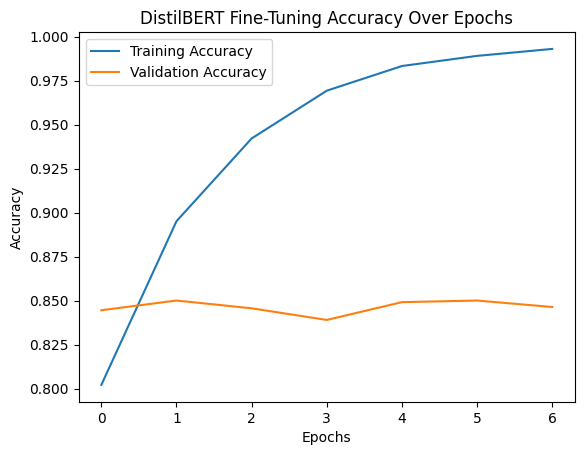

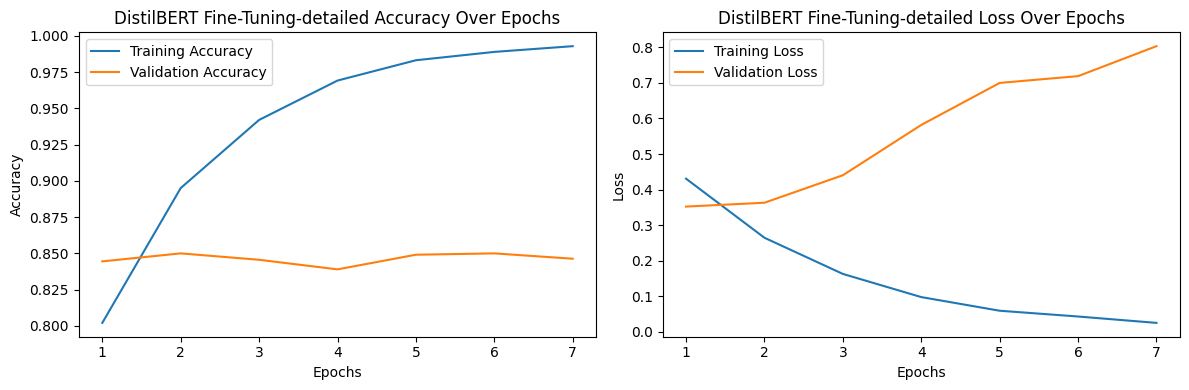

In [21]:
# Plot the results
plot_history(distilbert_history, 'DistilBERT Fine-Tuning')
print()
# Plot the training and validation accuracy and loss
plot_history_detailed(distilbert_history, 'DistilBERT Fine-Tuning-detailed')

In [20]:
print('\nRunning DistilBERT Test...')

t0 = time.time()
distilbert_model.eval()

total_test_accuracy = 0
total_test_loss = 0

for batch in test_dataloader:
    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)

    with torch.no_grad():
        outputs = distilbert_model(
            b_input_ids,
            attention_mask=b_input_mask,
            labels=b_labels
        )

    loss = outputs.loss
    logits = outputs.logits

    total_test_loss += loss.item()

    preds = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = label_ids.flatten()

    total_test_accuracy += np.sum(preds_flat == labels_flat) / len(labels_flat)

avg_test_accuracy = total_test_accuracy / len(test_dataloader)
print('DistilBERT Test Accuracy: {0:.4f}'.format(avg_test_accuracy))

avg_test_loss = total_test_loss / len(test_dataloader)
test_time = format_time(time.time() - t0)

print('DistilBERT Test Loss: {0:.4f}'.format(avg_test_loss))
print('DistilBERT Test took: {}'.format(test_time))



Running DistilBERT Test...
DistilBERT Test Accuracy: 0.8502
DistilBERT Test Loss: 0.8109
DistilBERT Test took: 0:00:02


## Part 3: RoBERTa Fine-Tuning

In [25]:
# Part 3: RoBERTa Fine-Tuning
epochs=40

from transformers import RobertaForSequenceClassification, RobertaTokenizer

# Initialize RoBERTa tokenizer and model
roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
roberta_model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)

# Move model to GPU if available
roberta_model.to(device)

# Define optimizer and scheduler
roberta_optimizer = AdamW(roberta_model.parameters(), lr=2e-5, eps=1e-8)
roberta_scheduler = get_linear_schedule_with_warmup(
    roberta_optimizer,
    num_warmup_steps=0,
    num_training_steps=len(train_dataloader) * epochs
)

# History dictionary for tracking performance
roberta_history = {
    'accuracy': [],
    'val_accuracy': [],
    'loss': [],
    'val_loss': []
}

best_val_accuracy = 0
epochs_no_improve = 0

for epoch_i in range(epochs):
    print(f'\n======== Epoch {epoch_i + 1} / {epochs} ========')
    print('Training RoBERTa...')

    # Training
    t0 = time.time()
    total_train_loss = 0
    total_train_accuracy = 0

    roberta_model.train()


    for batch in train_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        roberta_model.zero_grad()

        outputs = roberta_model(
            b_input_ids,
            attention_mask=b_input_mask,
            labels=b_labels
        )

        loss = outputs.loss
        logits = outputs.logits
        total_train_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(roberta_model.parameters(), 1.0)
        roberta_optimizer.step()
        roberta_scheduler.step()

        # Training accuracy
        preds = logits.detach().cpu().numpy()
        labels = b_labels.cpu().numpy()
        batch_accuracy = np.sum(np.argmax(preds, axis=1).flatten() == labels.flatten()) / len(labels)
        total_train_accuracy += batch_accuracy

    avg_train_loss = total_train_loss / len(train_dataloader)
    avg_train_accuracy = total_train_accuracy / len(train_dataloader)
    training_time = format_time(time.time() - t0)


    print('')
    print('Average training loss: {0:.4f}'.format(avg_train_loss))
    print('Average training accuracy: {0:.4f}'.format(avg_train_accuracy))
    print('Training epoch took: {}'.format(training_time))

    # Record training metrics
    roberta_history['loss'].append(avg_train_loss)
    roberta_history['accuracy'].append(avg_train_accuracy)

    # Validation
    print('\nRunning Validation on RoBERTa...')
    roberta_model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0

    for batch in validation_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        with torch.no_grad():
            outputs = roberta_model(
                b_input_ids,
                attention_mask=b_input_mask,
                labels=b_labels
            )

        loss = outputs.loss
        logits = outputs.logits
        total_eval_loss += loss.item()

        preds = logits.detach().cpu().numpy()
        labels = b_labels.cpu().numpy()
        batch_accuracy = np.sum(np.argmax(preds, axis=1).flatten() == labels.flatten()) / len(labels)
        total_eval_accuracy += batch_accuracy

    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    avg_val_loss = total_eval_loss / len(validation_dataloader)

    # Record validation metrics
    roberta_history['val_loss'].append(avg_val_loss)
    roberta_history['val_accuracy'].append(avg_val_accuracy)

    print(f"Validation Accuracy: {avg_val_accuracy:.4f}")
    print(f"Validation Loss: {avg_val_loss:.4f}")

    # Early stopping
    if avg_val_accuracy > best_val_accuracy:
        best_val_accuracy = avg_val_accuracy
        epochs_no_improve = 0
        best_model_state = roberta_model.state_dict()
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print('Early stopping triggered.')
            roberta_model.load_state_dict(best_model_state)
            break


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 40 ========
Training RoBERTa...

Average training loss: 0.6965
Average training accuracy: 0.4998
Training epoch took: 0:01:20

Running Validation on RoBERTa...
Validation Accuracy: 0.5221
Validation Loss: 0.6923

======== Epoch 2 / 40 ========
Training RoBERTa...

Average training loss: 0.6909
Average training accuracy: 0.5308
Training epoch took: 0:01:20

Running Validation on RoBERTa...
Validation Accuracy: 0.5960
Validation Loss: 0.6720

======== Epoch 3 / 40 ========
Training RoBERTa...

Average training loss: 0.6443
Average training accuracy: 0.6314
Training epoch took: 0:01:20

Running Validation on RoBERTa...
Validation Accuracy: 0.6324
Validation Loss: 0.6471

======== Epoch 4 / 40 ========
Training RoBERTa...

Average training loss: 0.5527
Average training accuracy: 0.7179
Training epoch took: 0:01:20

Running Validation on RoBERTa...
Validation Accuracy: 0.6377
Validation Loss: 0.6523

======== Epoch 5 / 40 ========
Training RoBERTa...

Average training lo

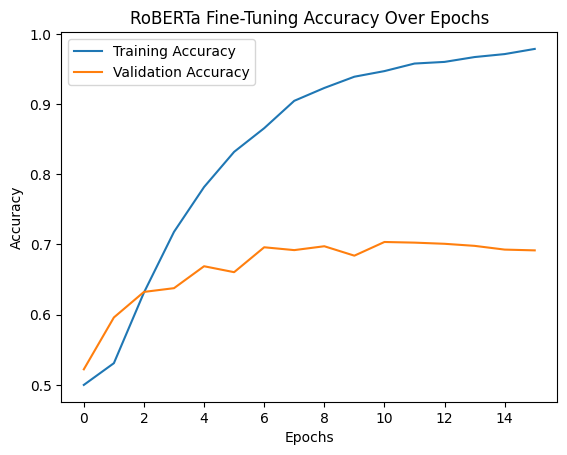

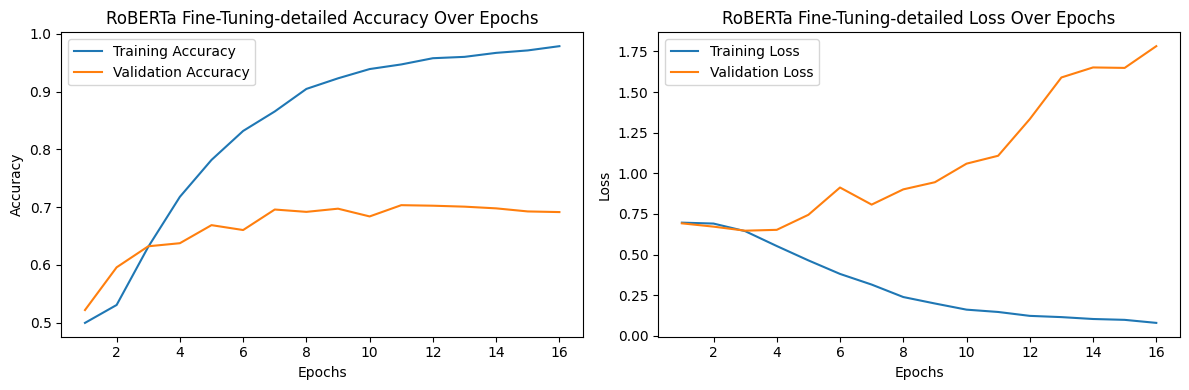

In [26]:
# Plot the results
plot_history(roberta_history, 'RoBERTa Fine-Tuning')
print()
# Plot the training and validation accuracy and loss
plot_history_detailed(roberta_history, 'RoBERTa Fine-Tuning-detailed')

In [27]:
print('\nRunning RoBERTa Test...')

t0 = time.time()
roberta_model.eval()

total_test_accuracy = 0
total_test_loss = 0

for batch in test_dataloader:
    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)

    with torch.no_grad():
        outputs = roberta_model(
            b_input_ids,
            attention_mask=b_input_mask,
            labels=b_labels
        )

    loss = outputs.loss
    logits = outputs.logits

    total_test_loss += loss.item()

    preds = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = label_ids.flatten()

    total_test_accuracy += np.sum(preds_flat == labels_flat) / len(labels_flat)

avg_test_accuracy = total_test_accuracy / len(test_dataloader)
print('RoBERTa Test Accuracy: {0:.4f}'.format(avg_test_accuracy))

avg_test_loss = total_test_loss / len(test_dataloader)
test_time = format_time(time.time() - t0)

print('RoBERTa Test Loss: {0:.4f}'.format(avg_test_loss))
print('RoBERTa Test took: {}'.format(test_time))



Running RoBERTa Test...
RoBERTa Test Accuracy: 0.7276
RoBERTa Test Loss: 1.6750
RoBERTa Test took: 0:00:04


##  Part 4: XLNet Fine-Tuning

> Add blockquote



In [37]:
# Part 4: XLNet Fine-Tuning
epochs=20

from transformers import XLNetForSequenceClassification, XLNetTokenizer

# Initialize XLNet tokenizer and model
xlnet_tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
xlnet_model = XLNetForSequenceClassification.from_pretrained('xlnet-base-cased', num_labels=2)

# Move model to GPU if available
xlnet_model.to(device)

# Define optimizer and scheduler
xlnet_optimizer = AdamW(xlnet_model.parameters(), lr=2e-5, eps=1e-8)
xlnet_scheduler = get_linear_schedule_with_warmup(
    xlnet_optimizer,
    num_warmup_steps=0,
    num_training_steps=len(train_dataloader) * epochs
)

# History dictionary for tracking performance
xlnet_history = {
    'accuracy': [],
    'val_accuracy': [],
    'loss': [],
    'val_loss': []
}

best_val_accuracy = 0
epochs_no_improve = 0

for epoch_i in range(epochs):
    print(f'\n======== Epoch {epoch_i + 1} / {epochs} ========')
    print('Training XLNet...')

    # Training
    t0 = time.time()
    total_train_loss = 0
    total_train_accuracy = 0

    xlnet_model.train()

    for batch in train_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        xlnet_model.zero_grad()

        outputs = xlnet_model(
            b_input_ids,
            attention_mask=b_input_mask,
            labels=b_labels
        )

        loss = outputs.loss
        logits = outputs.logits
        total_train_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(xlnet_model.parameters(), 1.0)
        xlnet_optimizer.step()
        xlnet_scheduler.step()

        # Training accuracy
        preds = logits.detach().cpu().numpy()
        labels = b_labels.cpu().numpy()
        batch_accuracy = np.sum(np.argmax(preds, axis=1).flatten() == labels.flatten()) / len(labels)
        total_train_accuracy += batch_accuracy

    avg_train_loss = total_train_loss / len(train_dataloader)
    avg_train_accuracy = total_train_accuracy / len(train_dataloader)
    training_time = format_time(time.time() - t0)

    print(f'\nAverage training loss: {avg_train_loss:.4f}')
    print(f'Average training accuracy: {avg_train_accuracy:.4f}')
    print(f'Training epoch took: {training_time}')

    # Record training metrics
    xlnet_history['loss'].append(avg_train_loss)
    xlnet_history['accuracy'].append(avg_train_accuracy)

    # Validation
    print('\nRunning Validation on XLNet...')
    xlnet_model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0

    for batch in validation_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        with torch.no_grad():
            outputs = xlnet_model(
                b_input_ids,
                attention_mask=b_input_mask,
                labels=b_labels
            )

        loss = outputs.loss
        logits = outputs.logits
        total_eval_loss += loss.item()

        preds = logits.detach().cpu().numpy()
        labels = b_labels.cpu().numpy()
        batch_accuracy = np.sum(np.argmax(preds, axis=1).flatten() == labels.flatten()) / len(labels)
        total_eval_accuracy += batch_accuracy

    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    avg_val_loss = total_eval_loss / len(validation_dataloader)

    # Record validation metrics
    xlnet_history['val_loss'].append(avg_val_loss)
    xlnet_history['val_accuracy'].append(avg_val_accuracy)

    print(f"Validation Accuracy: {avg_val_accuracy:.4f}")
    print(f"Validation Loss: {avg_val_loss:.4f}")

    # Early stopping
    if avg_val_accuracy > best_val_accuracy:
        best_val_accuracy = avg_val_accuracy
        epochs_no_improve = 0
        best_model_state = xlnet_model.state_dict()
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print('Early stopping triggered.')
            xlnet_model.load_state_dict(best_model_state)
            break


Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 20 ========
Training XLNet...

Average training loss: 0.7033
Average training accuracy: 0.5202
Training epoch took: 0:01:44

Running Validation on XLNet...
Validation Accuracy: 0.5778
Validation Loss: 0.6903

======== Epoch 2 / 20 ========
Training XLNet...

Average training loss: 0.6478
Average training accuracy: 0.6226
Training epoch took: 0:01:45

Running Validation on XLNet...
Validation Accuracy: 0.6333
Validation Loss: 0.6817

======== Epoch 3 / 20 ========
Training XLNet...

Average training loss: 0.5392
Average training accuracy: 0.7292
Training epoch took: 0:01:45

Running Validation on XLNet...
Validation Accuracy: 0.6952
Validation Loss: 0.6189

======== Epoch 4 / 20 ========
Training XLNet...

Average training loss: 0.4173
Average training accuracy: 0.8125
Training epoch took: 0:01:45

Running Validation on XLNet...
Validation Accuracy: 0.7051
Validation Loss: 0.6916

======== Epoch 5 / 20 ========
Training XLNet...

Average training loss: 0.3199
Average

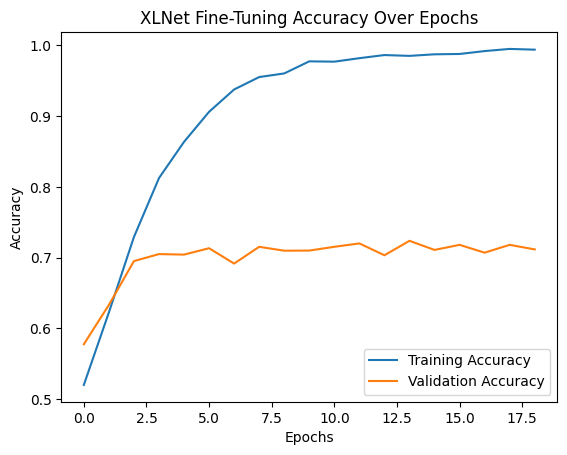

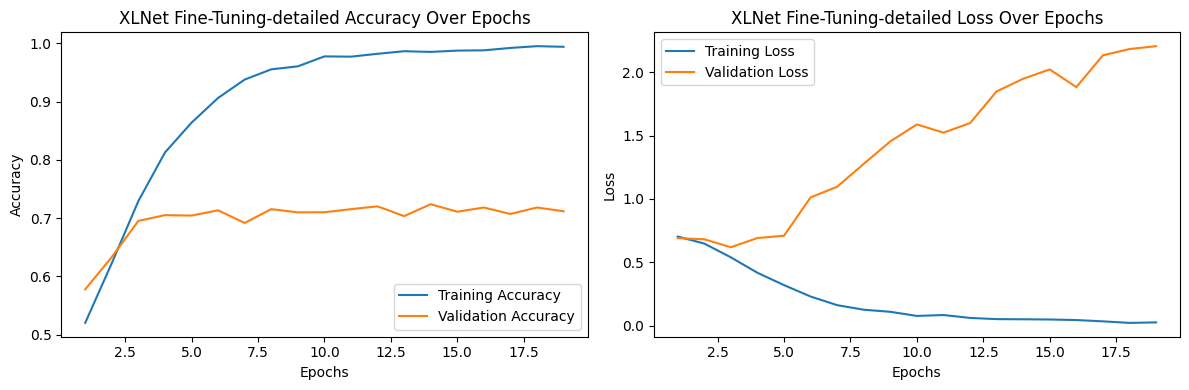

In [38]:
# Plot the results
plot_history(xlnet_history, 'XLNet Fine-Tuning')
print()
# Plot the training and validation accuracy and loss
plot_history_detailed(xlnet_history, 'XLNet Fine-Tuning-detailed')

In [39]:
print('\nRunning XLNet Test...')

t0 = time.time()
xlnet_model.eval()

total_test_accuracy = 0
total_test_loss = 0

for batch in test_dataloader:
    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)

    with torch.no_grad():
        outputs = xlnet_model(
            b_input_ids,
            attention_mask=b_input_mask,
            labels=b_labels
        )

    loss = outputs.loss
    logits = outputs.logits

    total_test_loss += loss.item()

    preds = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = label_ids.flatten()

    total_test_accuracy += np.sum(preds_flat == labels_flat) / len(labels_flat)

avg_test_accuracy = total_test_accuracy / len(test_dataloader)
print('XLNet Test Accuracy: {0:.4f}'.format(avg_test_accuracy))

avg_test_loss = total_test_loss / len(test_dataloader)
test_time = format_time(time.time() - t0)

print('XLNet Test Loss: {0:.4f}'.format(avg_test_loss))
print('XLNet Test took: {}'.format(test_time))




Running XLNet Test...
XLNet Test Accuracy: 0.7504
XLNet Test Loss: 2.0082
XLNet Test took: 0:00:04


## Part 5: ALBERT Fine-Tuning


In [40]:
# Part 5: ALBERT Fine-Tuning

from transformers import AlbertForSequenceClassification, AlbertTokenizer

# Initialize ALBERT tokenizer and model
albert_tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')
albert_model = AlbertForSequenceClassification.from_pretrained('albert-base-v2', num_labels=2)

# Move model to GPU if available
albert_model.to(device)

# Define optimizer and scheduler
albert_optimizer = AdamW(albert_model.parameters(), lr=2e-5, eps=1e-8)
albert_scheduler = get_linear_schedule_with_warmup(
    albert_optimizer,
    num_warmup_steps=0,
    num_training_steps=len(train_dataloader) * epochs
)

# History dictionary for tracking performance
albert_history = {
    'accuracy': [],
    'val_accuracy': [],
    'loss': [],
    'val_loss': []
}

best_val_accuracy = 0
epochs_no_improve = 0

for epoch_i in range(epochs):
    print(f'\n======== Epoch {epoch_i + 1} / {epochs} ========')
    print('Training ALBERT...')

    # Training
    t0 = time.time()
    total_train_loss = 0
    total_train_accuracy = 0

    albert_model.train()

    for batch in train_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        albert_model.zero_grad()

        outputs = albert_model(
            b_input_ids,
            attention_mask=b_input_mask,
            labels=b_labels
        )

        loss = outputs.loss
        logits = outputs.logits
        total_train_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(albert_model.parameters(), 1.0)
        albert_optimizer.step()
        albert_scheduler.step()

        # Training accuracy
        preds = logits.detach().cpu().numpy()
        labels = b_labels.cpu().numpy()
        batch_accuracy = np.sum(np.argmax(preds, axis=1).flatten() == labels.flatten()) / len(labels)
        total_train_accuracy += batch_accuracy

    avg_train_loss = total_train_loss / len(train_dataloader)
    avg_train_accuracy = total_train_accuracy / len(train_dataloader)
    training_time = format_time(time.time() - t0)

    print(f'\nAverage training loss: {avg_train_loss:.4f}')
    print(f'Average training accuracy: {avg_train_accuracy:.4f}')
    print(f'Training epoch took: {training_time}')

    # Record training metrics
    albert_history['loss'].append(avg_train_loss)
    albert_history['accuracy'].append(avg_train_accuracy)

    # Validation
    print('\nRunning Validation on ALBERT...')
    albert_model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0

    for batch in validation_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        with torch.no_grad():
            outputs = albert_model(
                b_input_ids,
                attention_mask=b_input_mask,
                labels=b_labels
            )

        loss = outputs.loss
        logits = outputs.logits
        total_eval_loss += loss.item()

        preds = logits.detach().cpu().numpy()
        labels = b_labels.cpu().numpy()
        batch_accuracy = np.sum(np.argmax(preds, axis=1).flatten() == labels.flatten()) / len(labels)
        total_eval_accuracy += batch_accuracy

    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    avg_val_loss = total_eval_loss / len(validation_dataloader)

    # Record validation metrics
    albert_history['val_loss'].append(avg_val_loss)
    albert_history['val_accuracy'].append(avg_val_accuracy)

    print(f"Validation Accuracy: {avg_val_accuracy:.4f}")
    print(f"Validation Loss: {avg_val_loss:.4f}")

    # Early stopping
    if avg_val_accuracy > best_val_accuracy:
        best_val_accuracy = avg_val_accuracy
        epochs_no_improve = 0
        best_model_state = albert_model.state_dict()
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print('Early stopping triggered.')
            albert_model.load_state_dict(best_model_state)
            break


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 20 ========
Training ALBERT...

Average training loss: 0.7028
Average training accuracy: 0.4946
Training epoch took: 0:01:35

Running Validation on ALBERT...
Validation Accuracy: 0.5156
Validation Loss: 0.6924

======== Epoch 2 / 20 ========
Training ALBERT...

Average training loss: 0.6966
Average training accuracy: 0.5156
Training epoch took: 0:01:35

Running Validation on ALBERT...
Validation Accuracy: 0.5101
Validation Loss: 0.6922

======== Epoch 3 / 20 ========
Training ALBERT...

Average training loss: 0.6787
Average training accuracy: 0.5794
Training epoch took: 0:01:35

Running Validation on ALBERT...
Validation Accuracy: 0.6256
Validation Loss: 0.6736

======== Epoch 4 / 20 ========
Training ALBERT...

Average training loss: 0.6253
Average training accuracy: 0.6571
Training epoch took: 0:01:35

Running Validation on ALBERT...
Validation Accuracy: 0.6454
Validation Loss: 0.6342

======== Epoch 5 / 20 ========
Training ALBERT...

Average training loss: 0.539

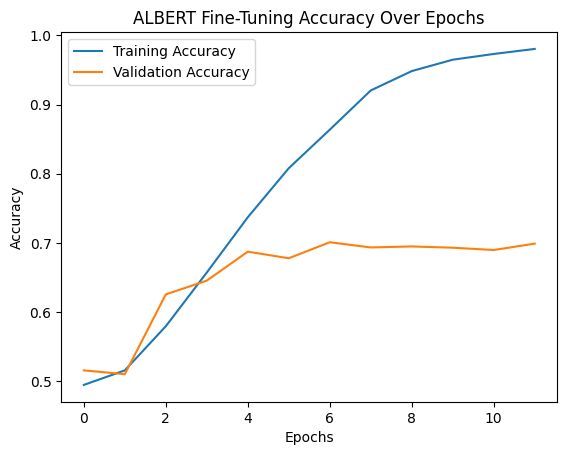

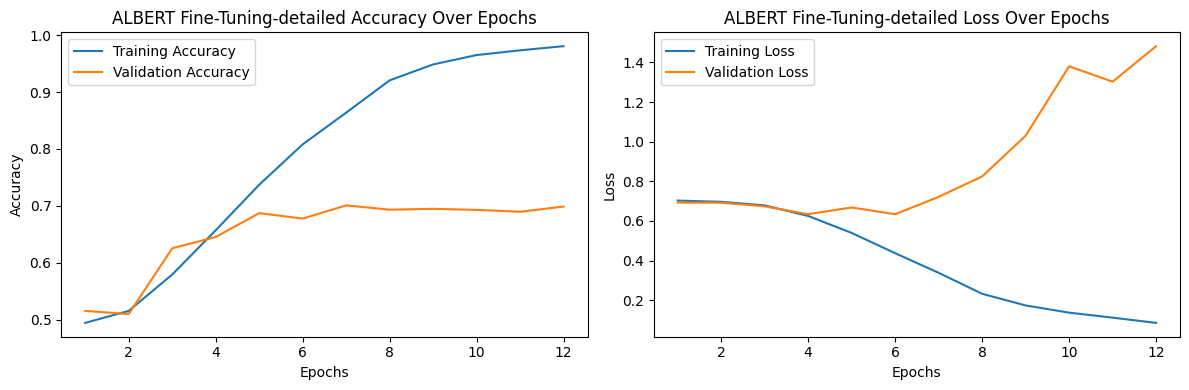

In [41]:
# Plot the results
plot_history(albert_history, 'ALBERT Fine-Tuning')
print()
# Plot the training and validation accuracy and loss
plot_history_detailed(albert_history, 'ALBERT Fine-Tuning-detailed')

In [42]:
print('\nRunning ALBERT Test...')

t0 = time.time()
albert_model.eval()

total_test_accuracy = 0
total_test_loss = 0

for batch in test_dataloader:
    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)

    with torch.no_grad():
        outputs = albert_model(
            b_input_ids,
            attention_mask=b_input_mask,
            labels=b_labels
        )

    loss = outputs.loss
    logits = outputs.logits

    total_test_loss += loss.item()

    preds = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = label_ids.flatten()

    total_test_accuracy += np.sum(preds_flat == labels_flat) / len(labels_flat)

avg_test_accuracy = total_test_accuracy / len(test_dataloader)
print('ALBERT Test Accuracy: {0:.4f}'.format(avg_test_accuracy))

avg_test_loss = total_test_loss / len(test_dataloader)
test_time = format_time(time.time() - t0)

print('ALBERT Test Loss: {0:.4f}'.format(avg_test_loss))
print('ALBERT Test took: {}'.format(test_time))



Running ALBERT Test...
ALBERT Test Accuracy: 0.7029
ALBERT Test Loss: 1.4485
ALBERT Test took: 0:00:04


##  Part 6: ELECTRA Fine-Tuning

In [57]:
# Part 6: ELECTRA Fine-Tuning
epochs= 15
from transformers import ElectraForSequenceClassification, ElectraTokenizer

# Initialize ELECTRA tokenizer and model
electra_tokenizer = ElectraTokenizer.from_pretrained('google/electra-base-discriminator')
electra_model = ElectraForSequenceClassification.from_pretrained('google/electra-base-discriminator', num_labels=2)

# Move model to GPU if available
electra_model.to(device)

# Define optimizer and scheduler
electra_optimizer = AdamW(electra_model.parameters(), lr=2e-5, eps=1e-8)
electra_scheduler = get_linear_schedule_with_warmup(
    electra_optimizer,
    num_warmup_steps=0,
    num_training_steps=len(train_dataloader) * epochs
)

# History dictionary for tracking performance
electra_history = {
    'accuracy': [],
    'val_accuracy': [],
    'loss': [],
    'val_loss': []
}

best_val_accuracy = 0
epochs_no_improve = 0

for epoch_i in range(epochs):
    print(f'\n======== Epoch {epoch_i + 1} / {epochs} ========')
    print('Training ELECTRA...')

    # Training
    t0 = time.time()
    total_train_loss = 0
    total_train_accuracy = 0

    electra_model.train()

    for batch in train_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        electra_model.zero_grad()

        outputs = electra_model(
            b_input_ids,
            attention_mask=b_input_mask,
            labels=b_labels
        )

        loss = outputs.loss
        logits = outputs.logits
        total_train_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(electra_model.parameters(), 1.0)
        electra_optimizer.step()
        electra_scheduler.step()

        # Training accuracy
        preds = logits.detach().cpu().numpy()
        labels = b_labels.cpu().numpy()
        batch_accuracy = np.sum(np.argmax(preds, axis=1).flatten() == labels.flatten()) / len(labels)
        total_train_accuracy += batch_accuracy

    avg_train_loss = total_train_loss / len(train_dataloader)
    avg_train_accuracy = total_train_accuracy / len(train_dataloader)
    training_time = format_time(time.time() - t0)

    print(f'\nAverage training loss: {avg_train_loss:.4f}')
    print(f'Average training accuracy: {avg_train_accuracy:.4f}')
    print(f'Training epoch took: {training_time}')

    # Record training metrics
    electra_history['loss'].append(avg_train_loss)
    electra_history['accuracy'].append(avg_train_accuracy)

    # Validation
    print('\nRunning Validation on ELECTRA...')
    electra_model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0

    for batch in validation_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        with torch.no_grad():
            outputs = electra_model(
                b_input_ids,
                attention_mask=b_input_mask,
                labels=b_labels
            )

        loss = outputs.loss
        logits = outputs.logits
        total_eval_loss += loss.item()

        preds = logits.detach().cpu().numpy()
        labels = b_labels.cpu().numpy()
        batch_accuracy = np.sum(np.argmax(preds, axis=1).flatten() == labels.flatten()) / len(labels)
        total_eval_accuracy += batch_accuracy

    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    avg_val_loss = total_eval_loss / len(validation_dataloader)

    # Record validation metrics
    electra_history['val_loss'].append(avg_val_loss)
    electra_history['val_accuracy'].append(avg_val_accuracy)

    print(f"Validation Accuracy: {avg_val_accuracy:.4f}")
    print(f"Validation Loss: {avg_val_loss:.4f}")

    # Early stopping
    if avg_val_accuracy > best_val_accuracy:
        best_val_accuracy = avg_val_accuracy
        epochs_no_improve = 0
        best_model_state = electra_model.state_dict()
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print('Early stopping triggered.')
            electra_model.load_state_dict(best_model_state)
            break


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instea


======== Epoch 1 / 15 ========
Training ELECTRA...

Average training loss: 0.3531
Average training accuracy: 0.8522
Training epoch took: 0:01:16

Running Validation on ELECTRA...
Validation Accuracy: 0.9086
Validation Loss: 0.2443

======== Epoch 2 / 15 ========
Training ELECTRA...

Average training loss: 0.1911
Average training accuracy: 0.9332
Training epoch took: 0:01:17

Running Validation on ELECTRA...
Validation Accuracy: 0.8978
Validation Loss: 0.3021

======== Epoch 3 / 15 ========
Training ELECTRA...

Average training loss: 0.1197
Average training accuracy: 0.9640
Training epoch took: 0:01:16

Running Validation on ELECTRA...
Validation Accuracy: 0.9070
Validation Loss: 0.3787

======== Epoch 4 / 15 ========
Training ELECTRA...

Average training loss: 0.0765
Average training accuracy: 0.9801
Training epoch took: 0:01:17

Running Validation on ELECTRA...
Validation Accuracy: 0.9042
Validation Loss: 0.4287

======== Epoch 5 / 15 ========
Training ELECTRA...

Average training lo

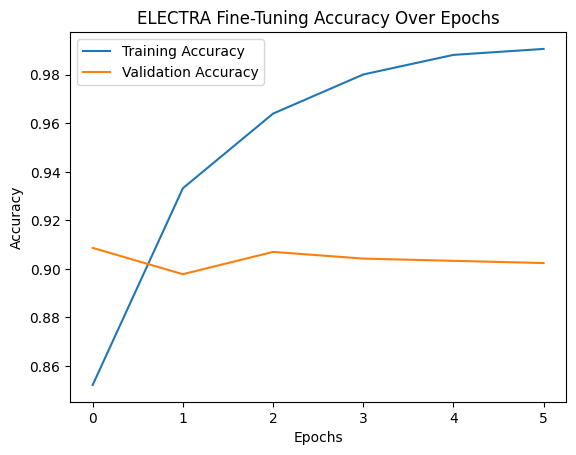

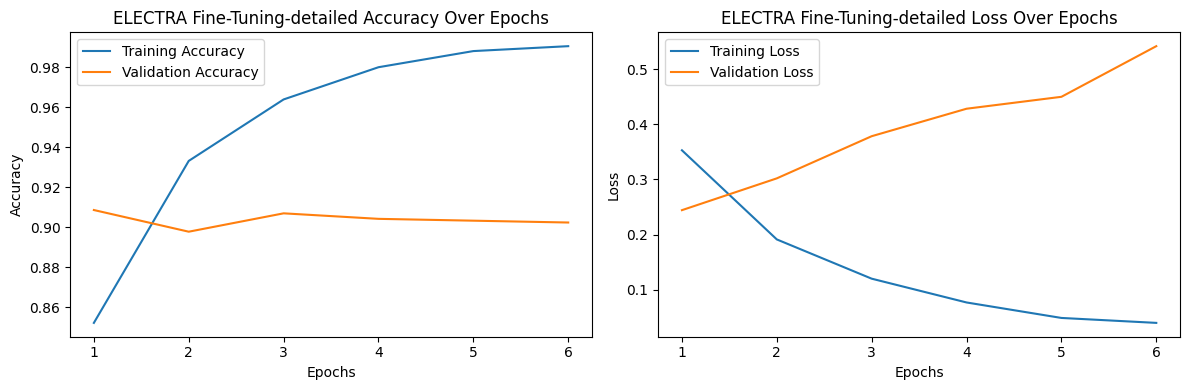

In [58]:
# Plot the results
plot_history(electra_history, 'ELECTRA Fine-Tuning')
print()
# Plot the training and validation accuracy and loss
plot_history_detailed(electra_history, 'ELECTRA Fine-Tuning-detailed')

In [59]:
print('\nRunning ELECTRA Test...')

t0 = time.time()
electra_model.eval()

total_test_accuracy = 0
total_test_loss = 0

for batch in test_dataloader:
    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)

    with torch.no_grad():
        outputs = electra_model(
            b_input_ids,
            attention_mask=b_input_mask,
            labels=b_labels
        )

    loss = outputs.loss
    logits = outputs.logits

    total_test_loss += loss.item()

    preds = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = label_ids.flatten()

    total_test_accuracy += np.sum(preds_flat == labels_flat) / len(labels_flat)

avg_test_accuracy = total_test_accuracy / len(test_dataloader)
print('ELECTRA Test Accuracy: {0:.4f}'.format(avg_test_accuracy))

avg_test_loss = total_test_loss / len(test_dataloader)
test_time = format_time(time.time() - t0)

print('ELECTRA Test Loss: {0:.4f}'.format(avg_test_loss))
print('ELECTRA Test took: {}'.format(test_time))



Running ELECTRA Test...
ELECTRA Test Accuracy: 0.9007
ELECTRA Test Loss: 0.5316
ELECTRA Test took: 0:00:03


## Results

### Question 3e:
Describe your final improvement strategy in Part 3.5. Report the accuracy on the test set using your improved model.

**Ans:**  
- **Improvement Strategy**:  
  In Part 3.5, we implemented and fine-tuned several advanced pretrained Transformer models, including **BERT**, **DistilBERT**, **RoBERTa**, **XLNet**, **ALBERT**, and **ELECTRA**. By leveraging these pretrained models, we aimed to improve our sentiment classification accuracy. The best improvement strategy was to fine-tune **ELECTRA** on the sentiment classification task due to its efficient discriminative training process, which allows it to achieve high accuracy with relatively low computational costs.

- **Test Set Accuracy (Improved Model)**:  
  The best-performing model was **ELECTRA**, which achieved a test set accuracy of **90.07%**.

---

### Question 3f:
Compare the results across different solutions above and describe your observations with possible discussions.

**Ans:**  
- **Comparison of Results**:  
  The results across the models showed a clear performance difference. **ELECTRA** achieved the highest accuracy, followed by **DistilBERT** and **BERT**. **RoBERTa**, **ALBERT**, and **XLNet** displayed comparatively lower accuracy and higher test loss, indicating that they may be less effective for this dataset.

- **Observations and Discussion**:  
  Fine-tuning pretrained models like **ELECTRA** and **DistilBERT** yielded better results due to their architecture and training optimizations, making them well-suited for sentiment classification tasks. **ELECTRA**'s performance suggests that its replaced-token detection strategy is particularly effective in this context, leading to a higher accuracy with faster processing times. For further details and visual comparisons of the model performances, please refer to the cell below.

---

### Summary of Model Performance

| Model         | Test Accuracy | Test Loss | Test Duration |
|---------------|---------------|-----------|---------------|
| **ELECTRA**   | 0.9007        | 0.5316    | 00:00:03      |
| **DistilBERT**| 0.8502        | 0.8109    | 00:00:02      |
| **BERT**      | 0.8456        | 1.2309    | 00:00:03      |
| **ALBERT**    | 0.7029        | 1.4485    | 00:00:04      |
| **XLNet**     | 0.7504        | 2.0082    | 00:00:04      |
| **RoBERTa**   | 0.7276        | 1.6750    | 00:00:04      |

### Analysis

1. **Best Performing Model**:
   - **ELECTRA** achieved the highest accuracy (0.9007) and the lowest test loss (0.5316). This suggests that the **ELECTRA** model adapted best to the sentiment classification task among all models tested.
   
2. **Efficient and Accurate Models**:
   - **DistilBERT** shows a good balance between speed and accuracy. With an accuracy of 0.8502 and a short test duration of 00:00:02, **DistilBERT** is efficient and performs well, making it ideal for scenarios with limited computational resources.

3. **Standard BERT Performance**:
   - **BERT** achieved an accuracy of 0.8456, close to **DistilBERT** but with a slightly higher test loss of 1.2309. It performed moderately well, but **ELECTRA** and **DistilBERT** outperformed it in terms of both accuracy and loss.

4. **Lower-Performing Models**:
   - **ALBERT** and **XLNet** had lower test accuracies of 0.7029 and 0.7504, respectively. They also exhibited higher test losses, indicating they might be less suited for this dataset compared to **ELECTRA** or **DistilBERT**.
   - **RoBERTa** also showed relatively lower accuracy (0.7276) and higher test loss (1.6750), which suggests it may not be as optimized for this specific task.

### Conclusion and Recommendations

- **ELECTRA** is the best overall model for this task, achieving the highest accuracy and lowest loss. It would be the recommended model for deployment if accuracy is the primary concern.
- **DistilBERT** offers a great balance of performance and efficiency. For applications that need faster processing with slightly reduced accuracy, **DistilBERT** is ideal.
- **BERT** could also be considered if both **ELECTRA** and **DistilBERT** are unavailable, though it performs slightly worse.
- **ALBERT**, **XLNet**, and **RoBERTa** may not be as well-suited for this specific task, as evidenced by their lower accuracy and higher test loss.

